## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

知乎 - 深度學習超參數 Learning rate 與 Momentum 理解

<pre>
Learning rate：每次修正的幅度，太大則無法收斂，太小則修正過慢
Weight decay：增加正則用以避免 overfitting
Momentum：在修正方向上，增加動量，如牛頓定律一樣，增加動量有機會讓卡在局部最小值的狀態跳離
Learning rate decay：讓Learning rate 可以隨訓練進行慢慢減小，讓收斂狀態趨於穩
</pre>

參考連結：

1. [Estimating an Optimal Learning Rate For a Deep Neural Network](https://towardsdatascience.com/estimating-optimal-learning-rate-for-a-deep-neural-network-ce32f2556ce0)
2. [cs231n: learning and evaluation](http://cs231n.github.io/neural-networks-3/)
3. [知乎-深度學習超參數簡單理解>>>>>>learning rate,weight decay 和 momentum](https://zhuanlan.zhihu.com/p/23906526)

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if(i == 0):
            hidden_layer = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            hidden_layer = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(hidden_layer)
        
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(hidden_layer)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 20
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.9, 0.85, 0.80, 0.75]

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.2f" % (momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-momentum-%s" % str(momentum)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with MOMENTUM = 0.95
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
U

50000/50000 [==============================] - 8s 152us/step - loss: 1.4336 - acc: 0.4981 - val_loss: 1.4715 - val_acc: 0.4784
Experiment with MOMENTUM = 0.85
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_______________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 9s 176us/step - loss: 2.1733 - acc: 0.2225 - val_loss: 2.0684 - val_acc: 0.2808
Epoch 2/20
50000/50000 [==============================] - 9s 170us/step - loss: 2.0101 - acc: 0.2995 - val_loss: 1.9645 - val_acc: 0.3194
Epoch 3/20
50000/50000 [==============================] - 9s 184us/step - loss: 1.9288 - acc: 0.3294 - val_loss: 1.9056 - val_acc: 0.3330
Epoch 4/20
50000/50000 [==============================] - 10s 196us/step - loss: 1.8778 - acc: 0.3463 - val_loss: 1.8623 - val_acc: 0.3508
Epoch 5/20
50000/50000 [==============================] - 10s 193us/step - loss: 1.8419 - acc: 0.3588 - val_loss: 1.8318 - val_acc: 0.3572
Epoch 6/20
50000/50000 [==============================] - 9s 176us/step - loss: 1.8123 - acc: 0.3670 - val_loss: 1.8059 - val_acc: 0.3673
Epoch 7/20
50000/50000 [==============================] - 9s 186us/step - loss: 1.7884 - acc: 0.3746 - val_loss: 1.7838 

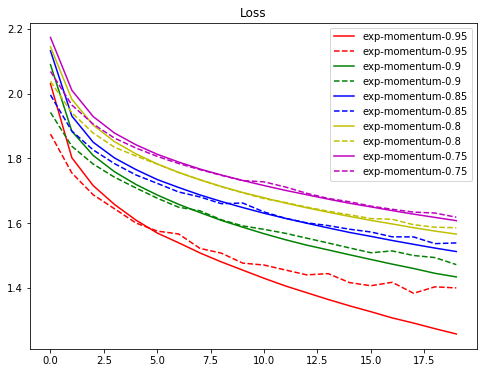

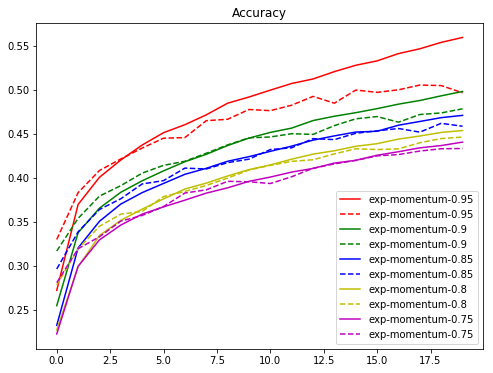

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()